In [10]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import rcParams
from scipy.ndimage.interpolation import rotate, zoom
import scipy as sp
import cv2
%matplotlib inline

In [2]:
imgPaths = glob.glob("../imgs/whale_*/w_*") # not test
nObs = len(imgPaths)
subset = np.random.randint(0,nObs,10)

In [114]:
def getImgMass(im):
    
    height, width = im.shape[0], im.shape[1]
    axes = [np.arange(height).astype('float32').repeat(width).reshape(height,width),
            np.arange(width).astype('float32').repeat(height).reshape(width,height).T]
    
    #Calculate centers of mass for color channels
    mass= [im[:,:,col].sum() for col in range(3)]
    m  =  [[(im[:,:,col]*axes[i]).sum()/mass[col] for i in range(2)] for col in range(3)]

    #Calculate second moments for red channel;
    mm =  [[(im[:,:,0]*axes[i]*axes[j]).sum()/mass[0] - m[0][i]*m[0][j]
             for i in range(2)]
             for j in range(2)]
    
    # If there is no green channel then make its centroid == red centroid for rotation purposes
    for i in range(len(m)):
        m[i] = m[i][::-1]
        if any([np.isnan(x) for x in m[i]]) == True:
            m[i] = m[0]
    
    return m,mm

class imgCropRotate():
    def __init__(self,imgPath,thresh=50,figsize=(20,10)):
        self.imgPath = imgPath
        x,mask = Image.open(imgPath), Image.open(imgPath.replace("w_","lf_"))
        w, h = x.size

        mask = mask.resize((w,h),Image.ANTIALIAS)
        x = np.array(x)
        maskThr = np.array(mask.point(lambda p: p > thresh and 255))
        self.x = x
        self.mask = maskThr
        self.m, self.mm = getImgMass(self.mask)
        self.figsize = figsize
        
    def show(self,):
        plt.figure(figsize=self.figsize)
        toDis = np.hstack((self.x,self.mask))
        plt.imshow(toDis)
        plt.show()

    def showCentroids(self):
        cpy = self.x.copy()
        for i in range(2):
            if i == 1:
                c = (255,255,0)
            else:
                c = (255,0,0)
            cv2.circle(cpy,tuple(map(int,self.m[i])),150 + i*50,c,40)
            plt.imshow(cpy)
        plt.show()

    def crop(self,show=0):

        try:
            mx, my = map(int,self.m[0])
            w2 = 600
            x1 = mx-w2
            y2 = my+w2
            y1 = my-w2
            x2 = mx+w2

            cropped = self.x
            cropped = cropped[y1:y2,x1:x2]
            cropped = Image.fromarray(cropped)
            cropped.save(self.imgPath.replace("w_","hS_"))
            
            if show == 1:
                plt.imshow(cropped)
                plt.title(self.imgPath)
                plt.show()
                
        except ValueError:
            plt.title(imgPath + " (COULDN'T CROP)")
            plt.imshow(np.hstack((self.x,self.mask)))
            plt.show()


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide


0 of 4543
(1545, 1277)
(1575, 1213)
(1930, 1126)
(1604, 1258)
(1233, 1330)
(1234, 876)
(1603, 1055)
(1565, 1215)
(1220, 1309)
(1538, 1209)
(2089, 1426)
(1315, 800)
(3792, 1628)
(1687, 1578)
(1448, 966)
(1738, 1258)
(2103, 967)
(1152, 1243)
(1490, 1036)
(1167, 1621)
(3153, 2267)
(624, 1482)
(1714, 1146)
(2093, 2088)
(1307, 975)
(1518, 1656)
(1888, 962)
(2139, 697)
(1809, 692)
(1023, 1069)
(2145, 1616)
(1365, 1478)
(1059, 1290)
(2569, 2566)
(1621, 1013)
(1802, 857)
(968, 1366)
(1089, 878)
(2888, 2049)
(1944, 1175)
(1768, 967)
(3095, 1742)
(3232, 2229)
(1889, 1188)
(1293, 1093)
(1354, 1447)
(3119, 1629)
(1698, 919)
(1992, 963)
(1607, 1160)
(1431, 1105)
(3315, 1479)
(2765, 1788)
(1476, 1174)
(2921, 2116)
(1333, 3080)
(3232, 1521)
(3274, 1951)
(1274, 2178)
(1748, 698)
(1601, 830)
(1603, 1207)
(1283, 2069)
(2555, 1848)
(1573, 851)
(1773, 995)
(1494, 1132)
(1620, 845)
(2492, 2259)
(1480, 1166)
(1462, 642)
(1896, 1246)
(2658, 1555)
(1397, 258)


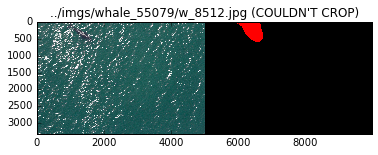

(2468, 1589)
(1958, 1516)
(1877, 905)
(1597, 1134)
(1800, 1357)
(1989, 997)
(1479, 1002)
(1787, 1369)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide


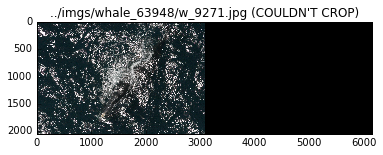

(2153, 1497)
(1785, 882)
(1915, 1082)
(2274, 1352)
(1685, 1128)
(1420, 1321)
(1976, 970)
(1228, 935)
(3377, 1113)
(1560, 631)
(1479, 994)
(1889, 1607)
(1485, 1388)
(1537, 809)
(2724, 1247)
(2910, 1467)
(1193, 898)
(1829, 1036)
(1463, 848)
(3353, 1627)
(1940, 931)
(1233, 784)
(2850, 1405)
(1695, 883)
(1736, 490)


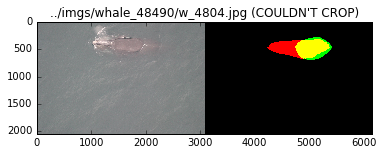

(1786, 1323)
(3343, 1787)
(1979, 1260)
(1326, 1547)
(1658, 1203)
(3121, 2066)
(1422, 1174)
(1545, 1150)
(1455, 1278)
(1505, 955)
(1533, 1604)
(1665, 909)
(2109, 1164)
(1510, 1200)
(1006, 1004)
(1485, 1150)
(1561, 1284)
(1322, 1153)
(1631, 1250)
(1456, 1079)
(1355, 1097)
(1491, 1165)
(2270, 1007)
(1275, 1150)
(1625, 840)
(1298, 912)
(1478, 1003)
(2093, 2174)
(1542, 1361)
(2319, 1514)
(2304, 1855)
(2621, 1384)
(2671, 1771)
(1587, 951)
(1736, 687)
(1349, 716)
(1708, 880)
(1372, 646)
(1223, 1100)
(2121, 1539)
(1782, 868)
(2114, 1319)
(1403, 1071)
(1890, 849)
(1651, 735)
(2028, 777)
(2700, 1850)
(1199, 501)


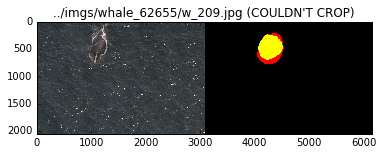

(1130, 1520)
(1397, 1343)
(1560, 1064)
(1749, 461)


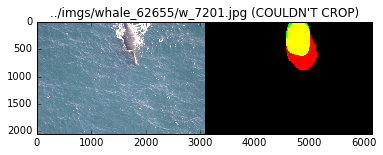

(1892, 1128)
(1443, 1040)
(1544, 810)
(1748, 813)
(1678, 1177)
(1936, 718)
(2014, 1847)
(1518, 1063)
(1787, 1330)
(1922, 1174)
(2328, 1135)
(1814, 960)
(1215, 1301)
(1361, 585)


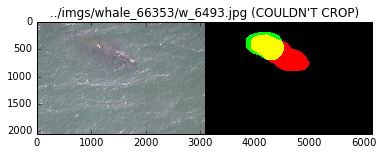

(1441, 577)


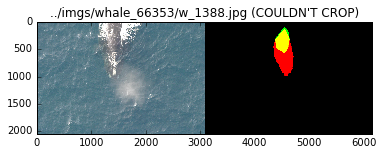

(1550, 842)
(1142, 1036)
(3018, 994)
(1320, 1349)
(1707, 1006)
(1725, 836)
(1514, 985)
(1611, 975)
(2902, 1279)
(2614, 1913)
(2919, 1526)
(1871, 1449)
(1315, 959)
(2642, 1725)
(1535, 1090)
(1156, 985)
(3735, 2293)
(1065, 969)
(2288, 2006)
(2572, 2363)
(2148, 2235)
(2192, 1828)
(2122, 2440)
(2724, 2918)
(1665, 1538)
200 of 4543
(1328, 866)
(1388, 860)
(1609, 554)


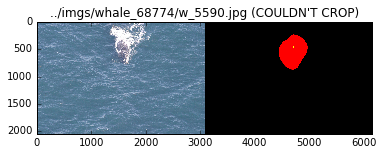

(1875, 423)


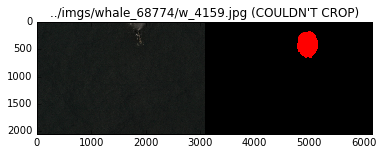

(1556, 541)


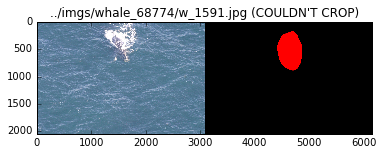

(1693, 1297)
(1739, 649)
(1143, 902)
(1667, 781)
(2955, 2191)
(2528, 2310)
(2387, 1565)
(1520, 1245)
(1285, 1185)
(1200, 1234)
(2972, 1273)
(3436, 1550)
(2675, 1627)
(2616, 1946)
(1624, 896)
(1235, 737)
(1499, 988)
(2417, 1067)
(2706, 2082)
(1925, 987)
(1398, 1417)
(1694, 1028)
(1560, 1221)
(2028, 2642)
(1649, 1243)
(1495, 394)


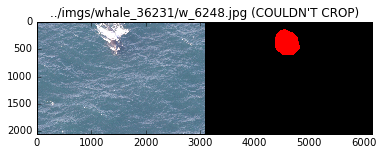

(2237, 789)
(1688, 1211)
(1809, 1498)
(1504, 1512)
(1364, 1041)
(1615, 1531)
(1320, 1036)
(2503, 2118)
(2604, 1562)
(1972, 405)


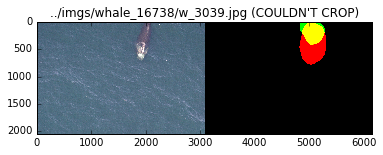

(2932, 2176)
(1699, 614)
(2072, 698)
(3375, 1154)
(3479, 2078)
(3600, 1449)
(1408, 585)


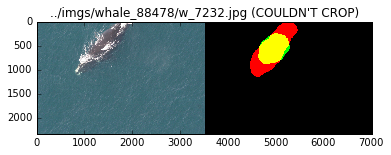

(1524, 1446)
(1939, 1549)
(1573, 1448)
(1310, 1403)
(1505, 1343)
(1822, 1020)
(1306, 1054)
(1310, 1177)
(3208, 2000)
(1461, 960)
(1571, 959)
(3056, 1402)
(1756, 1206)
(3231, 1223)
(1430, 1230)
(1734, 1323)
(963, 1051)
(1681, 857)
(1894, 1378)
(1571, 1090)
(1599, 619)
(1541, 1002)
(1743, 1068)
(3223, 1453)
(1828, 1326)
(1469, 1145)
(1721, 1383)
(1849, 1706)
(1891, 950)
(1578, 1107)
(1594, 1118)
(3605, 1238)
(1730, 1199)
(2068, 1405)
(1385, 775)
(1712, 907)
(1646, 963)
(1715, 1181)
(1513, 1401)
(1191, 991)
(1252, 742)
(1757, 1353)
(1353, 1146)
(1250, 971)
(1681, 1603)
(1454, 1091)
(1246, 752)
(1102, 849)
(1437, 744)
(2547, 2391)
(2460, 2174)
(3655, 2487)
(1571, 646)
(1470, 889)
(1313, 1313)
(1545, 1501)
(1208, 1141)
(1769, 1305)
(1783, 1180)
(1632, 1151)
(1448, 962)
(1590, 1090)
(1852, 863)
(1552, 1209)
(1234, 1068)
(1481, 948)
(1384, 953)
(1865, 1189)
(1801, 1249)
(1831, 783)
(1874, 1145)
(1414, 1324)
(1683, 1755)
(1092, 1078)
(1653, 1384)
(1540, 1234)
(1072, 857)
(1802, 868)
(1675, 122

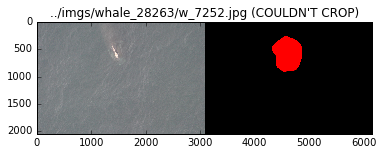

(1596, 1343)
(1264, 948)
(1566, 509)


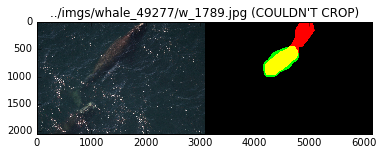

(1123, 1026)
(1588, 1037)
(2578, 1616)
(1597, 1634)
(1650, 823)
(1354, 1140)
(1640, 1317)
(1351, 888)
(1100, 1054)
(1843, 957)
(1385, 922)
(1232, 703)
(1633, 1236)
(1873, 1308)
(1558, 874)
(1691, 1258)
(1285, 1060)
400 of 4543
(1730, 1198)
(1546, 758)
(4013, 1827)
(2260, 2201)
(2605, 2165)
(2862, 1535)
(1520, 1245)
(1167, 1065)
(1258, 775)
(1388, 943)
(1691, 2178)
(1558, 1363)
(3339, 1633)
(1943, 966)
(1238, 1388)
(1528, 947)
(2790, 2050)
(1423, 1384)
(2094, 856)
(3317, 1552)
(2405, 1281)
(2248, 1539)
(1654, 1548)
(1819, 1606)
(1284, 1127)
(1413, 1229)
(1940, 843)
(1327, 1188)
(1569, 1092)
(2836, 1719)
(1457, 853)
(3362, 1944)
(1338, 936)
(1319, 1575)
(1594, 788)
(1805, 862)
(2095, 1350)
(3206, 820)
(1620, 857)
(1371, 1058)
(1732, 1183)
(3242, 1083)
(2474, 1487)
(1709, 1023)
(1479, 998)
(1548, 1105)
(1651, 1334)


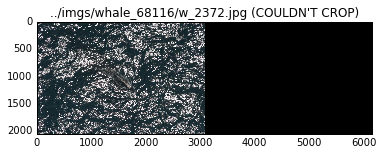

(1544, 914)
(1756, 768)
(2986, 1399)
(1388, 953)
(1763, 1233)
(1384, 871)
(1679, 970)
(1594, 1191)
(1441, 819)
(1603, 772)
(1489, 946)
(1540, 1291)
(1374, 1147)
(1469, 1042)
(1700, 1330)
(1647, 1233)
(1118, 914)
(2918, 1914)
(1743, 1019)
(1250, 1081)
(1964, 1040)
(1367, 1382)
(2227, 903)
(1682, 839)
(1423, 1198)
(1528, 1018)
(2845, 1955)
(1833, 1442)
(2394, 2138)
(1478, 826)
(3377, 2096)
(1776, 946)
(1349, 1296)
(1637, 1302)
(1579, 1574)
(1973, 826)
(1555, 1045)
(1680, 1153)
(1944, 1229)
(1495, 1405)
(2059, 796)
(1841, 1007)
(1904, 980)
(1698, 880)
(3267, 1308)
(2099, 2100)
(1660, 1021)
(1719, 1183)
(1283, 1051)
(1467, 1051)
(2477, 1613)
(1530, 1444)
(1785, 1235)
(1662, 1250)
(2490, 1980)
(1786, 829)
(1665, 1151)
(1767, 1225)
(2283, 2375)
(1771, 1163)
(1408, 1247)
(1611, 992)
(1291, 970)
(1676, 1419)
(1607, 1101)
(1549, 1519)
(1708, 1431)
(1411, 1007)
(1693, 1112)
(1449, 612)
(1789, 1381)
(3536, 2226)
(1556, 818)
(3185, 1887)
(3226, 2170)
(1852, 1382)
(1510, 1056)
(2551, 2012)
(1591, 1

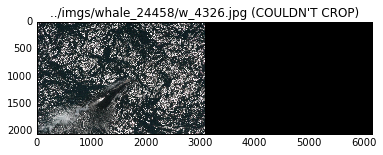

(1252, 678)
(1588, 1384)
(1411, 1259)
(1545, 1114)
(1372, 951)
(1473, 952)
(1549, 872)
(1522, 741)
(1578, 1106)
(1881, 1376)
(1718, 943)
(1605, 941)
(1965, 787)
(1434, 864)
(2321, 1144)
(2772, 1342)
(1269, 811)
(1271, 1264)
(1607, 938)
(1528, 810)
(1122, 849)
(1626, 861)
(1451, 1280)
(1855, 1541)
(1195, 959)
(1848, 974)
(1417, 729)
(2004, 1036)
(1029, 902)
(1695, 1574)
(1491, 982)
(1325, 784)
(2082, 1485)
(1605, 1072)
(2828, 1870)
(2636, 2413)
(2331, 1738)
(1833, 831)
(1715, 863)
(1625, 845)
(2586, 1977)
(2785, 2305)
(2365, 1625)
(1524, 655)
(2538, 1499)


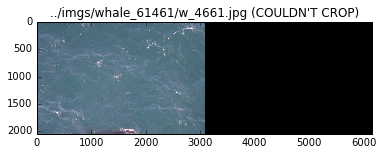

(1747, 1353)
(1351, 876)
(1755, 744)
(1350, 923)
(1456, 1006)
(1745, 1022)
(1664, 965)
(1257, 1176)
(1859, 1313)
(1830, 538)


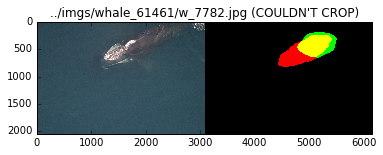

(1623, 1296)
(1525, 1078)
(1715, 1148)
(1200, 1172)
(1391, 1110)
(1359, 1049)
(1448, 903)
(1507, 1003)
(1163, 1010)
(1375, 836)
(1713, 1201)
(1539, 1297)
(1710, 1058)
(1609, 1039)
(1121, 1004)
(1542, 1051)
(1496, 998)
(3460, 2315)
(2076, 1295)
(1382, 1189)
(1165, 1038)
(1479, 1085)
(3368, 1713)
(1401, 874)
(1382, 1506)
(1573, 1306)
(1228, 1015)
(1614, 1047)
(1369, 1169)
(1625, 1177)
(1501, 903)
(1682, 1387)
(1433, 1459)
(1862, 1417)
(1394, 1311)
(1478, 633)
(1798, 762)
(1549, 740)
(1588, 1133)
(1722, 1060)
(1806, 1323)
(1490, 609)
(1509, 1064)
(1753, 1015)
(1648, 1017)
(1569, 1027)
(1425, 1445)
(1616, 1096)
(1349, 1315)
(1094, 1035)
(1775, 1181)
(1674, 2030)
(1816, 1455)
(1621, 1287)
(1592, 1303)
(1589, 1411)
(2210, 2042)
(2061, 1025)
(1695, 1271)
(1540, 1179)
(1519, 1281)
(2023, 1235)
(1308, 1468)
(1674, 1430)
(2874, 1917)
(1533, 760)
(1378, 1115)
(1369, 1175)
(1461, 731)
(1593, 1122)
(1674, 1736)
(1533, 1108)
(1397, 1091)
(1616, 893)
(1548, 787)
(3085, 1211)
(1594, 964)
(1384, 1377)


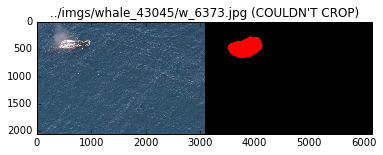

(1499, 974)
(1236, 830)
(2177, 698)
(1893, 925)
(1588, 1178)
(1863, 1090)
(1843, 1347)
(1288, 848)
(1341, 1059)
(1335, 1058)
(1049, 1114)
(1545, 723)
(1002, 709)
(1429, 780)
(1660, 797)
(1828, 962)
(1932, 1354)
(1676, 998)
(953, 655)
(1128, 1077)
(729, 527)


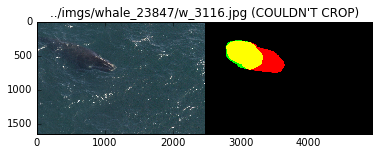

(1169, 967)
(1856, 715)
(1496, 787)
(1804, 944)
(2602, 1883)
(1671, 913)
(2609, 2392)
(1615, 820)
(1917, 848)
(1347, 860)
(1775, 1093)
(1504, 998)
(1319, 1010)
(1239, 873)
(1388, 919)
(1568, 616)
(1486, 1420)
(2086, 1210)
(2296, 1983)
(1861, 1147)
(1232, 904)
(1729, 1116)
(2657, 1669)
(1493, 1319)
(2531, 1698)
(2899, 1368)
(3187, 1979)
(2739, 1773)
(2141, 1733)
(1446, 667)
(1685, 1347)
(1996, 1945)
(2914, 2120)
(1528, 1381)
(1976, 975)
(1338, 1223)
(1449, 879)
(2337, 1798)
(1550, 971)
(1735, 1391)
(1431, 782)
(2633, 2055)
(1860, 467)


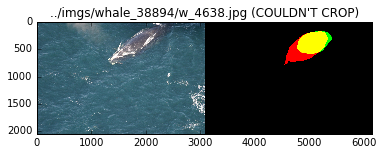

(1808, 877)
(2148, 1240)
(2022, 1587)
(2965, 2039)
(1248, 1405)
(1985, 1729)
(1313, 1215)
(1702, 1199)
(1507, 1307)
(2148, 1045)
(1279, 839)
(2127, 2553)
(1652, 993)
(1616, 1080)
(1506, 1065)
(1657, 1245)
(2425, 2276)
(1241, 1501)
(1959, 1859)
(1577, 1217)
(1597, 982)
(1946, 1192)
(2718, 1949)
(1584, 1026)
(1791, 843)
(1348, 1213)
(1522, 790)
(2346, 2749)
(1496, 881)
(2568, 1645)
(1561, 1202)
(1476, 733)
(1577, 948)
(1812, 1043)
(1769, 1403)
(1527, 955)
(1478, 1111)
(3092, 2166)
(1776, 1414)
(2835, 2037)
(3259, 1870)
(2696, 2057)
(2425, 1429)
(2720, 2117)
(2802, 1246)
(1291, 1193)
(2215, 1464)
(2664, 2189)
(2767, 2417)
(3278, 2437)
(3158, 1153)
(910, 502)


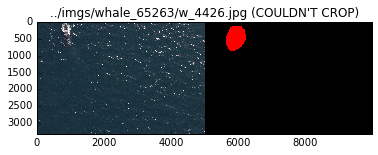

(918, 1145)
(1411, 980)
(1983, 950)
(1988, 1111)
(893, 1269)
(1472, 799)
(1598, 650)
(1505, 1143)
(2124, 1362)
(1898, 786)
(1484, 939)
(1572, 977)
(1416, 1406)
(1577, 1262)
(2945, 2093)
(1078, 1245)
(1807, 1103)
(1616, 736)
(1819, 1509)
(1203, 1482)
(1710, 1036)
(1654, 1409)
(1852, 1169)
(2860, 2025)
(1280, 900)
(1199, 610)
(1553, 1151)
(1643, 1484)
(951, 635)
(1623, 1413)
(1855, 997)
(1706, 937)
(1232, 1182)
(1477, 1560)
(1843, 1258)
(1353, 908)
(2724, 1504)
(1565, 1271)
(1920, 617)
(2270, 907)
(1590, 1186)
(1873, 1087)
(2331, 1776)
(3647, 1487)
(1238, 977)
(926, 1640)
(1812, 1252)
(1181, 1195)
(2236, 1031)
(2734, 1854)
(2322, 1914)
(1787, 971)
(1418, 1098)
(1568, 945)
(1421, 1016)
(1827, 1090)
(1261, 1164)
(1888, 911)
(2269, 998)
(1546, 807)
(1702, 852)
(1541, 904)
(1402, 1262)
(1717, 1235)
(1342, 1161)
(2107, 1046)
(1547, 1142)
(1344, 1040)
(1372, 1067)
(1396, 1337)
(1657, 1385)
1000 of 4543
(1856, 1185)
(1646, 1484)
(1991, 1397)
(1590, 597)


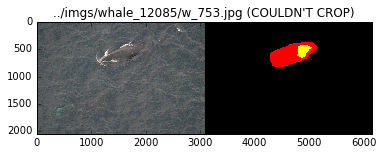

(1688, 794)
(1720, 1146)
(1081, 988)
(1569, 1444)
(1397, 1303)
(1431, 973)
(1810, 594)


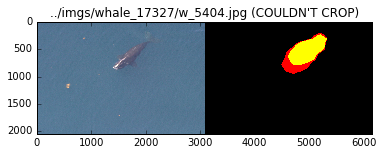

(1046, 596)


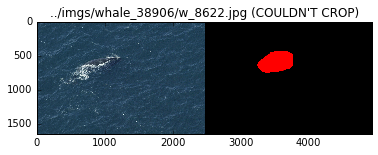

(1526, 2079)
(1214, 1472)


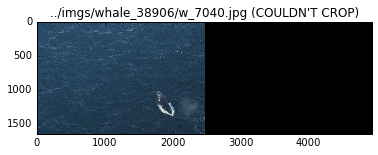

(1614, 1410)
(1093, 844)
(1508, 1079)
(1001, 1088)
(966, 359)


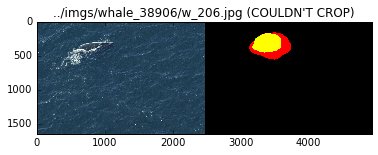

(1092, 1009)
(1626, 709)
(1554, 1303)
(1658, 1339)
(1005, 762)
(1775, 1498)
(1680, 1245)
(1737, 1142)
(1746, 1141)
(1538, 752)
(1486, 1177)
(2442, 1530)
(2684, 1181)
(2022, 715)
(1718, 876)
(1218, 1097)
(1323, 693)
(1725, 1454)
(1584, 1147)
(1617, 1069)
(1535, 1205)
(1735, 1251)
(1539, 1326)
(1169, 1297)
(1550, 966)
(1271, 1092)
(1329, 999)
(1372, 1139)
(1366, 988)
(1193, 1144)
(1844, 1264)
(1780, 909)
(2300, 1258)
(1257, 764)
(1821, 1480)
(1567, 1423)
(1657, 992)
(2020, 1087)
(1314, 992)
(1984, 1466)
(1145, 1109)
(1679, 948)
(1791, 1567)
(797, 865)
(1972, 1385)
(748, 1015)
(1858, 1201)
(1748, 1404)
(1647, 1319)
(1582, 1417)
(1842, 733)
(1342, 1672)
(1722, 1337)
(1686, 1165)
(2051, 1084)
(2576, 1378)
(1134, 1483)
(2736, 2058)
(1962, 2039)
(1342, 1156)
(1440, 1132)
(1596, 1370)
(3010, 2132)
(2047, 1116)
(1370, 1499)
(1562, 1011)
(1416, 1346)
(1193, 538)


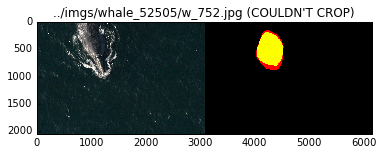

(1667, 895)
(1569, 1004)
(1774, 1346)
(1366, 958)
(1770, 897)
(1998, 1154)
(1178, 1102)
(1352, 1011)
(1285, 1881)
(2444, 1707)
(2949, 2363)
(1201, 964)
(759, 818)
(1629, 1471)
(1494, 1289)
(1884, 893)
(1708, 930)
(2487, 2318)
(1978, 1999)
(2813, 1894)
(2748, 1784)
(1451, 1434)
(2216, 981)
(2404, 1564)
(1338, 1142)
(1814, 805)
(2873, 2026)
(1263, 1043)
(1992, 1072)
(2644, 2445)
(1186, 1350)
(1504, 1178)
(1838, 1286)
(1501, 757)
(1783, 1144)
(1639, 959)
(1590, 904)
(699, 922)
(3238, 1547)
(1669, 918)
(1033, 1049)
(2370, 1155)
(1076, 982)
(3417, 2158)
(1936, 1141)
(1878, 1055)
(1085, 1252)
(1602, 767)
(2637, 2192)
(1178, 1222)
(1617, 671)
(1545, 893)
(1232, 1008)
(1069, 1140)
(1486, 974)
(1379, 1215)
(1738, 873)
(2199, 439)


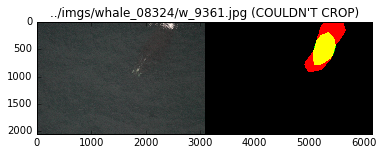

(1642, 1038)
(1683, 1212)
(1679, 838)
(1532, 921)
(1498, 984)
(1559, 1299)
(1792, 1135)
(657, 1221)
(1694, 831)
(1468, 1104)
(1489, 728)
(1535, 678)
(1547, 1171)
(1484, 1017)
(1783, 1178)
(2003, 1125)
(1765, 1008)
(1603, 1288)
(1543, 1134)
(1427, 936)
(1400, 882)
(1284, 591)


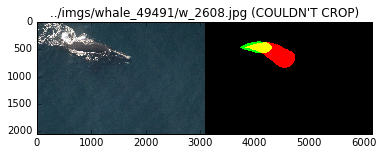

(1406, 1245)
(2206, 2225)
(2507, 1539)
(2445, 2026)
(1684, 870)
(1680, 642)
(1132, 815)
(1557, 872)
(1135, 1186)
(1861, 1195)
(1429, 1276)
(1619, 1314)
(1427, 994)
(1489, 1002)
(805, 1038)
(906, 589)


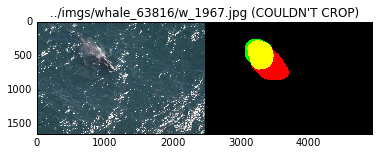

(1397, 865)
(1400, 962)
(1348, 780)
(1777, 1460)
(1462, 1231)
(1524, 1187)
(1832, 1160)
(1504, 778)
(1636, 1240)
(1427, 1278)
(1779, 1386)
(1421, 1114)
(1554, 1124)
(1162, 967)
(1778, 975)
(1509, 1107)
1200 of 4543
(1575, 1174)
(1606, 907)
(1453, 1201)
(2685, 2233)
(1535, 718)
(1667, 1072)
(1578, 899)
(2289, 1158)
(1275, 1212)
(1318, 1235)
(1508, 1094)
(1158, 1422)
(1336, 631)
(1667, 2615)
(1100, 1113)
(1853, 1187)
(1395, 1398)
(2626, 2097)
(2022, 1806)
(1883, 1691)
(2264, 2148)
(1483, 1116)
(2538, 1812)
(1630, 1326)
(1584, 1434)
(1767, 1123)
(1499, 1112)
(1286, 1411)
(1133, 1088)
(2942, 2045)
(1443, 865)
(1655, 580)


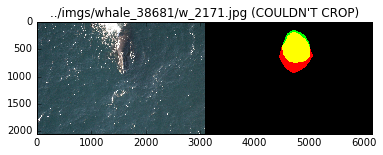

(1624, 948)
(1663, 982)
(1401, 951)
(2402, 1756)
(2836, 1474)
(2961, 2303)
(1508, 928)
(1515, 1258)
(1605, 1089)
(2027, 582)


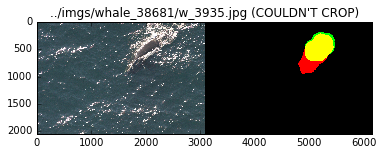

(1909, 1279)
(1254, 969)
(1697, 1756)
(2816, 1851)
(1141, 1051)
(1228, 1170)
(1636, 1581)
(1934, 1561)
(1667, 896)
(1377, 991)
(1188, 1224)
(1579, 1302)
(1091, 1584)
(1278, 1587)
(1682, 971)
(1306, 997)
(1242, 948)
(1091, 909)
(1406, 1110)
(1217, 1020)
(1364, 1073)
(1210, 1331)
(1473, 1315)
(2225, 2155)
(2407, 1616)
(1670, 752)
(2849, 1671)
(2698, 1923)
(1526, 721)
(1352, 1183)
(1509, 968)
(1714, 1257)
(1563, 1169)
(1719, 970)
(1655, 844)
(1585, 1274)
(1654, 1343)
(1583, 1213)
(1602, 1002)
(1511, 1028)
(2051, 1416)
(1436, 1012)
(1440, 1263)
(1528, 1214)
(1285, 995)
(1400, 877)
(2024, 1105)
(1864, 1139)
(2102, 1106)
(1836, 852)
(1663, 1107)
(1410, 636)
(1901, 1158)
(1940, 786)
(1935, 1179)
(3056, 2402)
(2165, 1074)
(2442, 1833)
(2111, 1363)
(2334, 1192)
(1969, 1023)
(1531, 1070)
(1034, 824)
(1788, 1340)
(1142, 881)
(1465, 1408)
(1695, 1377)
(1278, 1099)
(1317, 1162)
(1788, 769)
(1496, 981)
(1625, 1014)
(1784, 1082)
(1541, 1184)
(1386, 1462)
(1395, 992)
(1558, 1049)
(2319, 1879)
(1659, 1

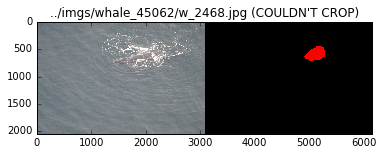

(1176, 1102)
(1544, 1079)
(1384, 904)
(1259, 1037)
(1745, 704)
(1495, 887)
(1136, 1197)
(1647, 842)
(1972, 1276)
(1140, 883)
(2870, 2062)
(1534, 873)
(1459, 1112)
(1192, 1197)
(1296, 401)


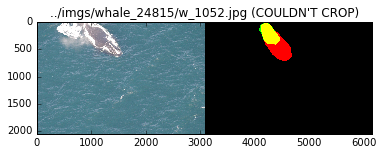

(1157, 1316)
(1343, 823)
(1449, 1072)
(1825, 817)
(2976, 2994)
(1061, 885)
(1610, 914)
(1892, 1263)
(1228, 1201)
(1596, 688)
(1900, 830)
(1215, 1351)
(1680, 1549)
(1557, 1422)
(1725, 1637)
(1399, 932)
(1303, 1016)
1400 of 4543
(1614, 1508)
(1770, 1399)
(1383, 946)
(1543, 1112)
(1096, 911)
(1603, 1269)
(1345, 978)
(1557, 1008)
(1555, 1110)
(1681, 1349)
(1530, 1091)
(1612, 857)
(1168, 721)
(1572, 1511)
(1095, 1395)
(1804, 1968)
(1521, 1413)
(2946, 1491)
(2679, 1588)
(1473, 853)
(1194, 1150)
(1581, 1420)
(1747, 1262)
(1509, 960)
(1765, 1010)
(2708, 1930)
(1636, 1107)
(1675, 867)
(1631, 1023)
(1802, 852)
(1523, 846)
(3043, 2355)
(2460, 1628)
(1374, 1304)
(1741, 898)
(2534, 1840)
(1236, 1217)
(2206, 1759)
(2514, 1778)
(1431, 1154)
(2359, 2020)
(1475, 1270)
(1781, 1086)
(1358, 1309)
(1858, 1402)
(1931, 935)
(1508, 1300)
(1849, 980)
(1459, 1275)
(1554, 1047)
(1469, 1033)
(2306, 739)
(1684, 1110)
(1652, 1361)
(1916, 1093)
(1429, 944)
(1785, 1108)
(1734, 787)
(1390, 1001)
(1197, 980)
(1768, 127

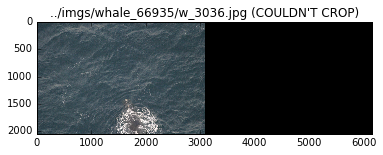

(1624, 1070)
(1397, 1400)
(1753, 1275)
(1462, 950)
(1479, 1118)
(1524, 1264)
(2738, 1903)
(2175, 1359)
(2469, 1432)
(3101, 1942)
(1526, 1085)
(1348, 1214)
(1668, 1115)
(1603, 1204)
(1363, 1164)
(1698, 1062)
(1802, 1147)
(1779, 1143)
(1497, 824)
(1841, 741)
(1896, 1312)
(1804, 971)
(1189, 431)


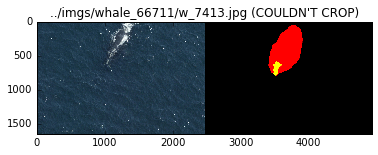

(1596, 1120)
(1687, 1003)
(1903, 1269)
(2180, 1247)
(1538, 1080)
(1325, 397)


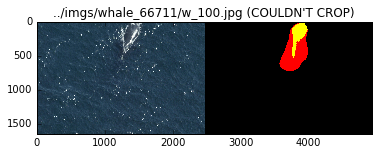

(1742, 1327)
(1655, 1159)
(1944, 774)
(1607, 1095)
(1746, 1228)
(1897, 1094)
(1380, 1335)
(1538, 1103)
(1700, 1565)
(1692, 1246)
(1848, 1202)
(1636, 1054)
(1563, 938)
(1736, 1078)
(1307, 1235)
(1139, 1174)
(2157, 1199)
(1162, 1185)
(1963, 1368)
(1385, 1132)
(1508, 1129)
(1656, 1274)
(1482, 1105)
(955, 1329)
(2561, 1621)
(1495, 792)
(2057, 1328)
(1975, 1148)
(2761, 1838)
(1594, 655)
(1655, 1218)
(1853, 1397)
(1663, 775)
(1655, 846)
(1563, 816)
(2387, 1364)
(1207, 693)
(1463, 666)
(1497, 1166)
(1669, 940)
(1596, 999)
(1327, 886)
(1217, 1427)
(1796, 876)
(2828, 1473)
(1547, 1117)
(3173, 2220)
(1216, 1273)
(2567, 1851)
(2041, 1748)
(1747, 905)
(2187, 1346)
(1250, 1370)
(1654, 866)
(2899, 1334)
(1694, 709)
(2787, 1827)
(2044, 843)
(1524, 626)
(1451, 1202)
(1881, 1036)
(2332, 1072)
(1777, 767)
(1589, 1138)
(1499, 844)
(1659, 1492)
(2215, 2240)
(1321, 1100)
(1526, 904)
(1214, 1547)
(1567, 1320)
(1269, 978)
(1526, 1310)
(1517, 876)
(3041, 1773)
(1406, 1040)
(1950, 1485)
(2089, 810)
(1417, 1284

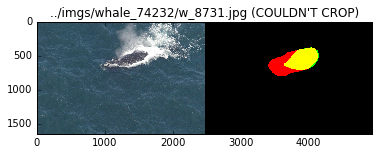

(1949, 1377)
(1301, 751)
(1723, 914)
(2036, 1212)
(1710, 1425)
(1641, 1050)
(1461, 1354)
(1190, 1053)
(1877, 503)


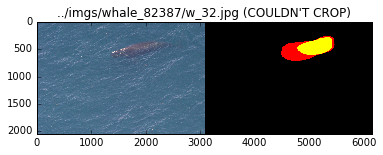

(1507, 876)
(1363, 1148)
(1003, 610)
(1615, 935)
(1834, 918)
(1827, 1278)
(3036, 1848)
(3475, 2413)
(1273, 811)
(2803, 1823)
(1477, 1480)
(1591, 969)
(1664, 797)
(921, 982)
(1716, 1366)
(1365, 1191)
(1632, 1146)
(1899, 1386)
(1909, 1015)
(1727, 659)
(1454, 805)
(1936, 1266)
(1590, 1207)
(1465, 575)


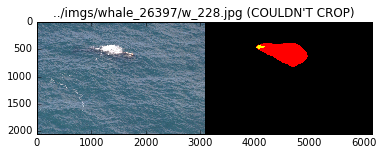

(1824, 1603)
(1833, 1385)
(1600, 1250)
(1626, 1052)
(1796, 1323)
(2477, 1110)
(2122, 2030)
(2469, 989)
(2706, 2091)
(1619, 1435)
(1371, 875)
(3158, 1310)
(1693, 802)
(3324, 1645)
(781, 1037)
(1937, 1433)
(1318, 1141)
(1182, 908)
(1337, 1402)
(1124, 1155)
(2025, 1511)
(1598, 1253)
(1590, 1179)
(1805, 937)
(1421, 1248)
(1592, 951)
(1984, 1182)
(1374, 1424)
(1329, 1197)
(1270, 1139)
(1120, 1216)
(1617, 1058)
(1706, 1118)
(1688, 640)
(1803, 860)
(1506, 1161)
(1746, 1104)
(1668, 885)
(1753, 1079)
(1701, 1084)
(1468, 1045)
(1745, 1024)
(1580, 913)
(1944, 1292)
(1584, 992)
(1551, 1068)
(1765, 804)
(2002, 1057)
(1574, 1033)
(1261, 1170)
(1378, 1240)
(1478, 1483)
(2474, 1712)
(2880, 1712)
(1309, 1180)
(1601, 978)
(1350, 768)
(1644, 1295)
(2712, 2455)
(2796, 2244)
(1545, 1066)
(2030, 1357)
(1712, 1191)
(1515, 963)
(1649, 1059)
(1598, 1028)
(1516, 1370)
(1300, 1042)
(1541, 996)
(1983, 1137)
(1665, 1399)
(1638, 923)
(1417, 1015)
(1681, 1230)
(2089, 1641)
(979, 863)
(2382, 1904)
(1266, 1115)
(2575,

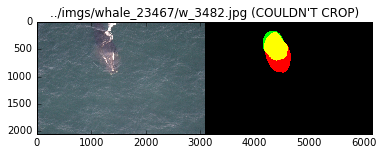

(1531, 858)
(1647, 1051)
(1707, 760)
(3447, 2137)
(1555, 600)
(1150, 796)
(3238, 1668)
(1602, 1079)
(1862, 1008)
(1382, 1194)
(1237, 1061)
(1550, 1069)
(1553, 1123)
(1577, 1016)
(1468, 1194)
(1303, 913)
(1722, 1037)
(1504, 824)
(1776, 934)
(1353, 851)
(1205, 976)
(1469, 918)
(1550, 737)
(1957, 1143)
(1369, 940)
(1376, 1120)
(1382, 1373)
(1198, 623)
(1763, 1115)
(1751, 1046)
(1269, 1253)
(1430, 830)
(2101, 1075)
(1286, 880)
(1869, 1264)
(1870, 1452)
(1053, 1489)
(1964, 895)
(1429, 1384)
(1518, 1465)
(1144, 1091)
(1640, 1157)
(1786, 943)
(1947, 2657)
(1521, 1262)
(1972, 769)
(1564, 1049)
(1832, 1152)
(1439, 1470)
(1337, 1264)
(1416, 1173)
(1602, 1424)
(2296, 1959)
(2211, 496)


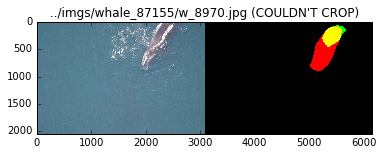

(1513, 962)
(1447, 1137)
(1442, 1223)
(1313, 791)
(1566, 1301)
(1929, 1108)
(1691, 1191)
(1739, 1374)
(1581, 856)
(1269, 981)
(1232, 553)


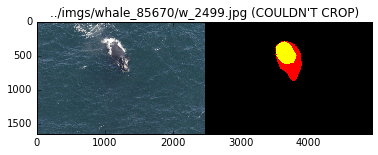

(1740, 1132)
(1475, 1721)
2000 of 4543
(1046, 1164)
(667, 509)


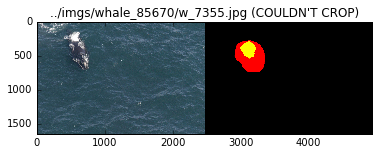

(1691, 809)
(1851, 1094)
(1816, 814)
(1678, 951)
(2712, 2512)
(2860, 2202)
(2713, 1144)
(1405, 1294)
(2861, 2416)
(3052, 2549)
(3105, 2059)
(1363, 1249)
(2178, 1107)
(1587, 1067)
(1186, 911)
(2776, 1820)
(1439, 751)
(2967, 2386)
(2500, 1997)
(2698, 2440)
(1293, 996)
(3601, 1889)
(1636, 1256)
(3549, 1655)
(1524, 882)
(1396, 1001)
(2327, 1949)
(1297, 929)
(1329, 729)
(1808, 1357)
(2454, 2128)
(2379, 1805)
(1967, 1316)
(2026, 1295)
(1594, 1057)
(1424, 1333)
(1676, 749)
(1488, 734)
(1643, 1398)
(1394, 1064)
(2416, 2213)
(1177, 1300)
(1046, 1341)
(2433, 1759)
(2572, 1821)
(1256, 911)
(1318, 1437)
(1796, 1215)
(1537, 858)
(1215, 970)
(1585, 906)
(1554, 1443)
(1514, 944)
(2049, 1173)
(1806, 961)
(1226, 1047)
(1511, 1232)
(1309, 1034)
(1690, 1467)
(1167, 1495)
(1332, 1058)
(1516, 647)
(3566, 1993)
(2365, 2468)
(3258, 2166)
(3533, 1943)
(1542, 630)
(1452, 1328)
(1551, 1287)
(1194, 1294)
(1551, 1035)
(1470, 1080)
(1440, 1153)
(2027, 1447)
(1487, 1200)
(2048, 1383)
(1784, 1367)
(1590, 950)
(1814,

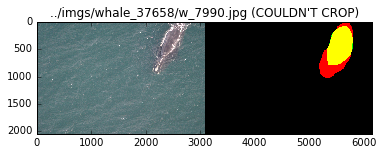

(1362, 1081)
(1644, 684)
(3355, 2010)
(1542, 1202)
(1321, 1313)
(1606, 1001)
(1765, 1151)
(1721, 1188)
(1984, 849)
(3327, 2175)
(1347, 742)
(1754, 1090)
(1617, 1360)
(1555, 935)
(861, 1480)
(1742, 970)
(1446, 821)
(946, 1201)
(1570, 999)
(1848, 681)
(2469, 2153)
(1836, 1197)
(1460, 1236)
(1771, 1182)
(1549, 720)
(2558, 2216)
(1296, 700)
(2551, 2436)
(2512, 1150)
(1207, 1174)
(1488, 816)
(1863, 832)
(1268, 944)
(1528, 827)
(1420, 802)
(1165, 838)
(1443, 1493)
(1505, 1150)
(1637, 1131)
(1669, 1213)
(1449, 1317)
(1519, 1076)
(1654, 1056)
(1522, 955)
(1450, 962)
(1854, 1728)
(1569, 979)
(2544, 1757)
(1709, 1409)
(1848, 1079)
(1985, 1047)
(1215, 1162)
(4338, 1401)
(2474, 1726)
(2670, 1776)
(1722, 848)
(1924, 921)
(1572, 927)
(1493, 1378)
(1245, 1103)
(1323, 804)
(1398, 1031)
(1093, 812)
(1637, 1254)
(773, 1250)
(1609, 1457)
(2236, 1039)
(1856, 1070)
(1422, 1018)
(1316, 994)
(1056, 840)
(1625, 889)
(1329, 910)
(2530, 1659)
(1595, 1499)
(1698, 1038)
(930, 1312)
(2578, 1710)
(1092, 1105)
(2468

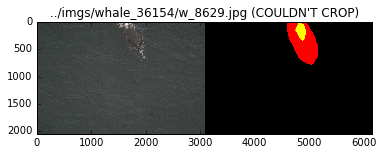

(1302, 830)
(1252, 1121)
(1231, 1188)
(1502, 1170)
(1703, 486)


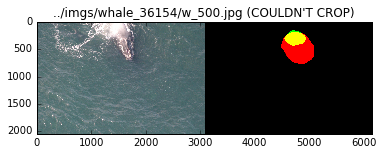

(1452, 1122)
(1791, 896)
(1755, 1067)
(1826, 961)
(1731, 938)
(1673, 1238)
(1606, 940)
(1487, 911)
(1719, 1106)
(1579, 1504)
(1733, 1032)
(1344, 1109)
(1479, 1241)
(1341, 1032)
(1977, 1004)
(1617, 1229)
(1688, 1082)
(1562, 921)
(1405, 1107)
(2471, 2223)
(2711, 1752)
(2607, 1543)
(1574, 953)
(1573, 951)
(1549, 1021)
(1631, 828)
(2178, 2763)
(4018, 1761)
(1474, 1080)
(1548, 1140)
(3290, 2097)
(1561, 1100)
(1709, 1257)
(1640, 1314)
(1982, 1296)
(1463, 855)
(1584, 976)
(2792, 1638)
(2151, 2147)
(1731, 983)
(1604, 923)
(1606, 1338)
(1431, 871)
(2748, 857)
(2346, 1751)
(1418, 1029)
(1728, 961)
(2942, 1632)
(1395, 1054)
(1268, 1097)
(1275, 1228)
(1561, 867)
(1888, 1201)
(1248, 966)
(1588, 1120)
(1513, 1168)
(1147, 999)
(1464, 740)
(2268, 2624)
(1492, 1280)
(2513, 1635)
(2460, 1959)
(2204, 1236)
(1760, 1146)
(2582, 1985)
(1970, 1009)
(1805, 657)
(1813, 1408)
(1475, 1315)
(2287, 1336)
(1290, 1082)
(2362, 1967)
(2546, 2006)
(1816, 860)
(1367, 762)
(1685, 1340)
(2728, 2461)
(2269, 1174)
(1435, 10

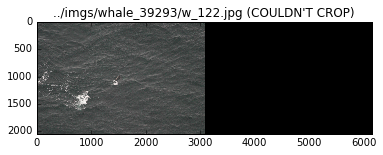

(1315, 1072)
(1373, 728)
(2084, 1187)
(1558, 753)
(1364, 711)
(1990, 1102)
(1616, 1216)
(1938, 648)
(1687, 957)
(1312, 902)
(1655, 675)
(1496, 1023)
(1514, 1031)
(1774, 1252)
(2624, 1886)
(2680, 1683)
(2236, 1455)
(1577, 1241)
(2857, 2287)
(3322, 2523)
(1279, 1046)
(3241, 1778)
(2125, 1489)
(3023, 1646)
(1863, 1296)
(1662, 911)
(1447, 1400)
(1726, 1348)
(1598, 1268)
(1756, 1201)
(1705, 1175)
(1470, 1136)
(1649, 1125)
(1544, 918)
(1866, 882)
(1485, 1065)
(2254, 1253)
(1485, 1009)
(1325, 1017)
(1938, 1073)
(1165, 826)
(2944, 1616)
(1915, 1218)
(1132, 1063)
(1598, 1008)
(1545, 1230)
(1310, 1019)
(1327, 1119)
(1445, 1155)
(1495, 1216)
(1388, 1261)
(1327, 975)
(1803, 949)
(1608, 1060)
(1298, 1344)
(1300, 1405)
(1222, 1139)
(1657, 1186)
(1640, 866)
(1172, 852)
2400 of 4543
(1884, 1022)
(1218, 1003)
(1672, 729)
(1454, 1306)
(1535, 798)
(1202, 962)
(1860, 1214)
(2240, 1178)
(1423, 1023)
(1055, 1031)
(1816, 717)
(1631, 938)
(1081, 858)
(1391, 1221)
(2102, 1111)
(1198, 839)
(1439, 1335)
(1224, 1

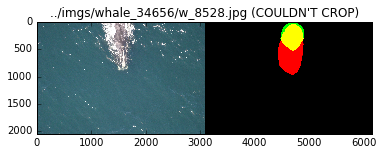

(1411, 1117)
(1880, 1337)
(1763, 1064)
(1460, 658)
(1731, 1197)
(1157, 736)
(1531, 703)
(1451, 1192)
(1789, 1014)
(1516, 1008)
(2394, 1119)
(1668, 963)
(1237, 638)
(3029, 1790)
(2489, 1002)
(1664, 866)
(2533, 1079)
(3011, 1492)
(1263, 2072)
(3776, 2106)
(3488, 1717)
(1974, 1270)
(3301, 1730)
(1611, 878)
(3179, 1238)
(1469, 763)
(1794, 1124)
(2552, 1354)
(1519, 960)
(1607, 1202)
(1739, 1295)
(1846, 1117)
(1594, 1081)
(1789, 1359)
(1711, 982)
(1951, 1479)
(1746, 1255)
(1654, 781)
(1771, 831)
(1894, 810)
(1878, 1299)
(2878, 1838)
(1947, 902)
(1974, 721)
(3269, 2399)
(1646, 985)
(1625, 1113)
(1580, 791)
(1744, 829)
(1848, 1293)
(1776, 1042)
(2223, 1116)
(1566, 840)
(1499, 1252)
(2581, 2021)
(1798, 755)
(1917, 1120)
(2026, 1269)
(1711, 756)
(1652, 1004)
(1792, 1106)
(1761, 810)
(1231, 1024)
(1278, 828)
(3222, 1623)
(3397, 1445)
(1494, 1202)
(1855, 859)
(1934, 860)
(1143, 971)
(3623, 1623)
(1717, 1241)
(1352, 909)
(3728, 1615)
(2601, 2021)
(2582, 1478)
(2387, 1783)
(2809, 1417)
(3062, 2162)


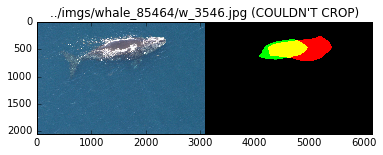

(1559, 237)


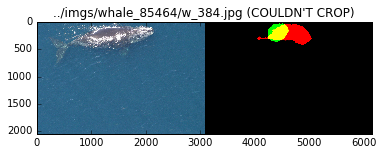

(1539, 844)
(1227, 816)
(1353, 493)


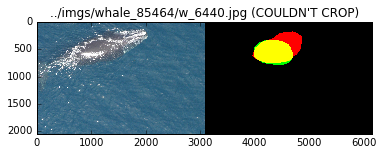

(1875, 1049)
(1604, 1014)
(1649, 1356)
(1711, 901)
(1689, 1336)
(1723, 932)
(1623, 937)
(1888, 955)
(1213, 716)
(1548, 1113)
(1239, 1562)
(1820, 1375)
(1519, 839)
(2426, 2029)
(1660, 919)
(2729, 2152)
(1538, 1343)
(1579, 991)
(1275, 1219)
(2654, 1868)
(3043, 2694)
(2728, 1856)
(1460, 1419)
(1699, 1118)
(1799, 1483)
(1481, 1136)
(1240, 1074)
(1421, 1083)
(1532, 901)
(1356, 894)
(1881, 1280)
(2324, 1994)
(2497, 1817)
(2660, 1561)
(2961, 1736)
(1071, 1028)
(3547, 1439)
(2441, 1691)
(1238, 1348)
(1300, 663)
(1531, 1110)
(1683, 809)
(1417, 952)
(1495, 922)
(1566, 1001)
(1666, 953)
(1386, 896)
(1848, 1454)
(1447, 951)
(1446, 1077)
(2182, 1198)
(1328, 1012)
(1622, 1009)
(1740, 903)
(1887, 1022)
(1619, 395)


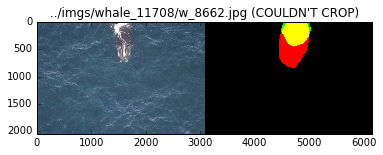

2600 of 4543
(1447, 664)
(1547, 1025)
(1452, 937)
(1829, 1051)
(2782, 1477)
(2672, 1987)
(1405, 1149)
(1806, 893)
(1257, 1020)
(1279, 959)
(1661, 1270)
(1721, 1035)
(1201, 989)
(1612, 1132)
(1404, 1035)
(1477, 1113)
(1026, 1001)
(1414, 981)
(1729, 1176)
(1190, 1342)
(1679, 783)
(1933, 1181)
(1323, 974)
(1065, 1139)
(1896, 1104)
(2157, 920)
(1431, 905)
(1568, 749)
(1567, 790)
(1160, 1000)
(1665, 980)
(1439, 1161)
(1238, 1088)
(2846, 2025)
(3576, 741)
(1569, 662)
(2292, 2151)
(1385, 971)
(1313, 994)
(2103, 777)
(3361, 2275)
(1736, 842)
(1255, 904)
(1385, 1106)
(1685, 1196)
(1232, 1359)
(1734, 934)
(1448, 914)


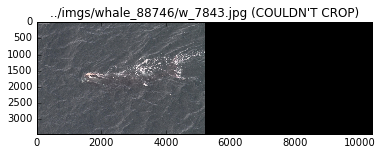

(1184, 991)
(1358, 1014)
(1922, 1814)
(3071, 1293)
(2764, 2414)
(1864, 1262)
(2001, 930)
(1251, 1169)
(1932, 1157)
(2147, 1490)
(1895, 883)
(1491, 1295)
(1763, 1563)
(1752, 801)
(905, 1143)
(1197, 771)
(2145, 965)
(1540, 130)


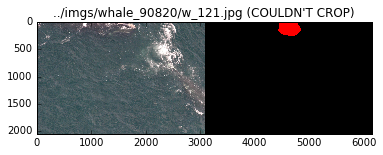

(1785, 856)
(1564, 1069)
(1074, 2562)
(1750, 1445)
(1360, 1265)
(1697, 850)
(1218, 1352)
(3904, 2035)
(1240, 1251)
(1682, 968)
(1934, 885)
(2079, 1347)
(1618, 1123)
(2044, 1014)
(1502, 1156)
(1436, 524)


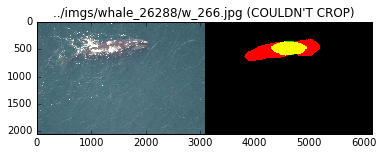

(1616, 934)
(3708, 685)
(3230, 1722)
(1308, 1300)
(2047, 1473)
(1251, 662)
(3145, 1453)
(1585, 732)
(1598, 1265)
(2006, 1471)
(1566, 1279)
(2173, 1036)
(1962, 994)
(2450, 1950)
(1747, 1327)
(1509, 1268)
(1548, 1153)
(3192, 1772)
(1410, 955)
(1832, 1356)
(1951, 1381)
(1656, 872)
(1354, 1014)
(2100, 961)
(1093, 444)


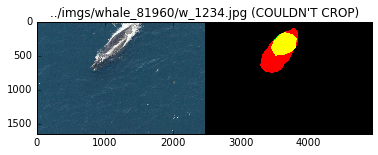

(1649, 719)
(1447, 1201)
(2336, 1507)
(2345, 1444)
(1464, 1113)
(1298, 866)
(1682, 1507)
(1708, 861)
(1785, 1342)
(1274, 1345)
(1237, 1040)
(1275, 1131)
(1783, 719)
(1697, 1193)
(1708, 1220)
(2018, 999)
(1354, 1169)
(1232, 926)
(1427, 911)
(1695, 1154)
(1722, 1440)
(1954, 738)
(1416, 1013)
(1647, 1126)
(1531, 1617)
(1768, 853)
(1775, 667)
(1407, 962)
(3372, 1633)
(1676, 1209)
(2799, 1536)
(1389, 1211)
(1870, 1958)
(1737, 1276)
(1770, 1031)
(1302, 905)
(1624, 573)


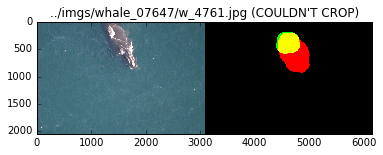

(2113, 1932)
(2362, 1135)
(1089, 2302)
(1274, 1019)
(1462, 1029)
(1291, 745)
(1562, 933)
(1458, 1048)
(1582, 666)
(1281, 615)
(1512, 929)
(1443, 964)
(1454, 1118)
(1385, 837)
(1695, 1132)
(2647, 1637)
(1499, 1405)
(2259, 1013)
(1325, 1124)
(1775, 1070)
(1510, 948)
(2848, 1886)
(1751, 1403)
(1312, 988)
(2850, 2482)
(3135, 2482)
(3412, 1755)
(1609, 1254)
(1730, 723)
(1563, 1056)
(1858, 1096)
(3162, 2161)
(2441, 1246)
(3309, 2355)
(1808, 2377)
(2466, 1773)
(2472, 1464)
(1873, 1024)
(1491, 770)
(572, 1048)


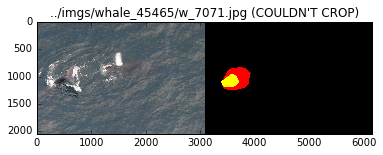

(2913, 2140)
(2413, 2322)
(3345, 1454)
(2225, 1654)
(1574, 1260)
(3231, 1475)
(2582, 1578)
(2627, 1657)
(1482, 1106)
(2610, 2067)
(1558, 1138)
(922, 995)
(1643, 1024)
(2649, 1835)
(1244, 634)
2800 of 4543
(2817, 2161)
(1763, 1470)
(1158, 1123)
(1141, 814)
(1804, 700)
(1708, 722)
(1433, 904)
(1041, 1008)
(1460, 1400)
(1725, 1016)
(1886, 1010)
(1704, 1045)
(1678, 1006)
(1647, 1311)
(1583, 607)
(1684, 1070)
(1331, 1419)
(1167, 1353)
(3011, 1104)
(1294, 1308)
(2596, 1708)
(1701, 1511)
(1568, 1028)
(1711, 1371)
(1888, 958)
(1698, 1269)
(1271, 1436)
(1530, 1349)
(1316, 1166)
(1482, 1239)
(2319, 1148)
(1107, 896)
(1501, 1169)
(1491, 870)
(1569, 951)
(1903, 1139)
(1962, 1400)
(2076, 1580)
(1838, 1118)
(1741, 1311)
(1645, 1252)
(1560, 937)
(1823, 808)
(1984, 1042)
(1502, 1320)
(1454, 753)
(1373, 1055)
(1872, 1398)
(1710, 1520)
(1668, 1310)
(1368, 1074)
(1728, 1133)
(2564, 1913)
(1214, 973)
(1360, 821)
(1876, 1009)
(1206, 1361)
(1480, 798)
(1944, 1286)
(1693, 1075)
(1749, 754)
(3011, 1562)
(1939

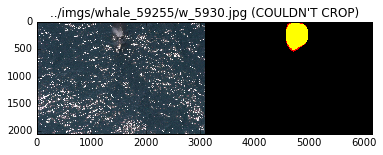

(1520, 1272)
(1206, 994)
(1178, 1071)
(1404, 1155)
(1512, 1366)
(1309, 1224)
(1304, 1181)
(1436, 1342)
(1484, 1263)
(1515, 1090)
(1399, 1046)
(1627, 1030)
(1963, 882)
(1030, 921)
(1930, 1381)
(1503, 804)
(1423, 1220)
(1327, 903)
(1549, 906)
(1583, 1284)
(1639, 963)
(1550, 956)
(1208, 738)
(1353, 947)
(2057, 1311)
(1417, 760)
(1478, 1043)
(1518, 638)
(1248, 895)
(1415, 793)
(1525, 1310)
(1572, 947)
(1752, 1066)
(2011, 1318)
(1336, 1267)
(1548, 1252)
(1476, 1097)
(1203, 1028)
(1465, 1193)
(1598, 628)
(1423, 776)
(1376, 1071)
(1334, 1319)
(1593, 1423)
(1730, 1019)
(1620, 1197)
(1273, 1369)
(2137, 985)
(1310, 1073)
(1581, 1087)
(2038, 1323)
(1402, 1639)
(1774, 843)
(1711, 880)
(1332, 1548)
(1174, 1012)
(1365, 815)
(1687, 1078)
(953, 1516)
(1442, 893)
(1511, 1354)
(1839, 1180)
(2856, 904)
(1534, 1043)
(1262, 1294)
(1539, 989)
(1200, 1252)
(1790, 1270)
(1432, 1203)
(1079, 824)
(1898, 1528)
(1870, 1356)
(2371, 1640)
(1331, 901)
(1726, 1070)
(2894, 1375)
(1554, 1068)
(1665, 973)
(1535, 1050)
(

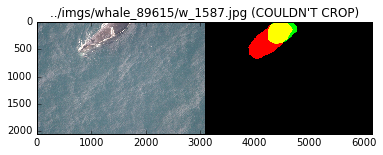

(1565, 1171)
(658, 783)
(1095, 910)
(1646, 1080)
(1556, 971)
(1561, 1258)
(1401, 1182)
(1614, 985)
(1216, 1090)
(1375, 1042)
(1659, 1099)
(1347, 990)
(1491, 895)
(1613, 859)
(1626, 1173)
(1392, 1328)
(1486, 926)
(1438, 1109)
(1897, 1006)
(1618, 1047)
(1280, 1430)
(926, 854)
(2309, 1404)
(1346, 776)
(1661, 1238)
(1853, 1325)
(2171, 1033)
(1800, 1324)
(1391, 1085)
(2037, 1288)
(1885, 1050)
(2501, 1428)
(2800, 1025)
(2862, 1585)
(1888, 962)
(1869, 1328)
(2515, 1784)
(1697, 1260)
(2099, 779)
(2336, 644)
(1296, 1250)
(3672, 1442)
(2663, 2125)
(1766, 1130)
(1639, 940)
(2919, 1372)
(1739, 1395)
(1641, 1090)
3000 of 4543
(3054, 1222)
(3352, 1323)
(1882, 1658)
(2300, 1183)
(1374, 1371)
(1711, 1458)
(2147, 1365)
(2257, 1655)
(1382, 1160)
(1573, 853)
(1691, 1301)
(1444, 1157)
(1263, 682)
(1347, 1190)
(1802, 1212)
(1221, 891)
(1471, 507)


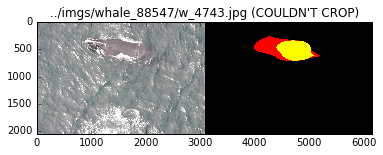

(1981, 1478)
(1667, 776)
(1226, 1167)
(1297, 1492)
(1469, 758)
(1899, 1055)


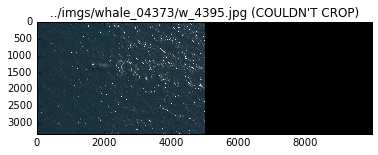

(888, 1140)
(1648, 1192)


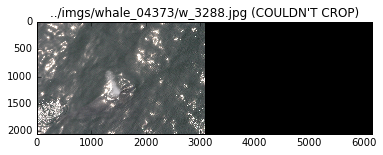

(1374, 624)
(1539, 1066)
(2757, 1393)
(2201, 862)
(1548, 1024)
(1487, 914)
(2612, 1197)
(1646, 1199)
(1896, 1857)
(1627, 745)
(1500, 1170)
(2128, 1612)
(1814, 872)
(2669, 1755)
(1593, 2156)
(1327, 1354)
(2380, 1498)
(1687, 1028)
(1262, 1287)
(1620, 1154)
(2986, 1255)
(1574, 1220)
(1605, 1581)
(2094, 781)
(1555, 1031)
(1941, 1118)
(1446, 1143)
(2067, 761)
(1978, 1080)
(1729, 1470)


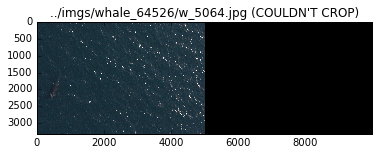

(858, 1272)
(1980, 1417)
(1331, 1401)
(1617, 1435)
(1743, 775)
(1313, 869)
(1551, 1087)
(1381, 1126)
(2837, 2102)
(1592, 1046)
(1422, 1250)
(2179, 2237)
(1012, 970)
(2050, 3102)
(1932, 1067)
(2566, 1785)
(1590, 1191)
(2013, 1386)
(2875, 945)
(2660, 2233)
(2705, 1572)
(2318, 1546)
(1666, 1115)
(1620, 1100)
(2039, 1128)
(1455, 866)
(1561, 791)
(1407, 1298)
(1966, 1280)
(1538, 766)
(1533, 1277)
(1377, 976)
(1807, 1563)
(1662, 980)
(1909, 1364)
(1640, 1127)
(2232, 1887)
(1400, 1262)
(2110, 1929)
(1495, 830)
(1453, 1596)
(1521, 1116)
(1582, 1065)
(2141, 880)
(1680, 1134)
(1718, 910)
(1046, 648)
(1711, 923)
(1356, 949)
(1562, 935)
(1428, 791)
(1595, 945)
(1843, 999)
(1664, 930)
(1525, 1059)
(1508, 825)
(1690, 1499)
(1816, 770)
(1787, 1124)
(1928, 1126)
(1764, 1283)
(1753, 1000)
(1746, 1254)
(1315, 933)
(1890, 1294)
(1568, 713)
(1949, 2444)
(1420, 574)


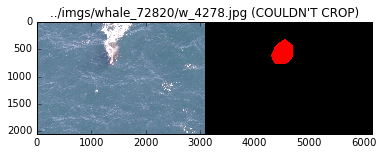

(1580, 890)
(1572, 1257)
(1848, 1147)
(1752, 822)
(1886, 1336)
(1489, 1230)
(1399, 1190)
(1517, 733)
(1987, 1107)
(1622, 225)


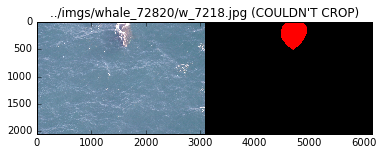

(1914, 1060)
(1753, 1228)
(1718, 990)
(1238, 1156)
(1684, 892)
(1834, 1182)
(1152, 283)


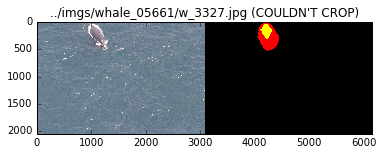

(1453, 812)
(2958, 2462)
(1392, 703)
(2586, 2128)
(1473, 1101)
(1078, 1022)
(1929, 971)
(1587, 966)
(1448, 1259)
(1496, 1337)
(1534, 1211)
(1738, 895)
(1801, 1087)
(1535, 1168)
(1660, 1185)
(1647, 1229)
(1374, 1071)
(1672, 962)
(1383, 1000)
(1516, 1013)
(1755, 1186)
(1697, 1258)
(1718, 1303)
(1746, 935)
(1328, 1257)
(1530, 1020)
(1913, 1255)
(2067, 1318)
(1600, 1169)
(1238, 1184)
(1477, 1276)
(1528, 1065)
(1582, 1022)
(2002, 621)
(1780, 899)
(2232, 1357)
(1899, 972)
(1634, 1253)
(1434, 1093)
(1544, 919)
(1492, 1429)
(1716, 1034)
(1401, 1037)
(1254, 1069)
(1347, 1546)
(1792, 1444)
(1368, 1294)
(1665, 805)
(1918, 970)
(1655, 1743)
(1843, 1337)
(1919, 632)
(1619, 1123)
(1614, 1096)
(1833, 960)
(1521, 1134)
(1364, 1264)
3200 of 4543
(1525, 1487)
(2065, 975)
(1619, 1334)
(1698, 924)
(1247, 954)
(1369, 678)
(1928, 1242)
(1952, 1247)
(1409, 1026)
(3362, 1145)
(1510, 935)
(1340, 1094)
(1462, 1247)
(1564, 1090)
(1176, 1186)
(1315, 761)
(1701, 1048)
(3716, 1368)
(2827, 1572)
(1241, 1420)


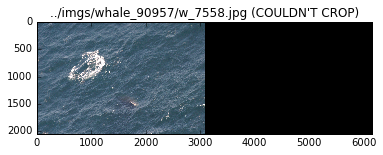

(1534, 1065)
(3060, 1897)
(1563, 1013)
(2720, 1433)
(2041, 1080)
(1304, 1191)
(1563, 1088)
(1729, 847)
(1368, 1198)
(1372, 874)
(1338, 1433)
(1371, 1399)
(2649, 1261)
(1409, 949)
(1556, 1382)
(1622, 998)
(1487, 1209)
(3013, 991)
(1529, 1214)
(1540, 719)
(2248, 2509)
(2651, 1855)
(1545, 905)
(1338, 944)
(2131, 1289)
(3006, 1658)
(1374, 846)
(1687, 914)
(1397, 786)
(2121, 1197)
(1368, 1216)
(1525, 957)
(1321, 731)
(1312, 636)
(1677, 736)
(1651, 955)
(1857, 1323)
(1323, 958)
(1456, 1404)
(1603, 1409)
(1926, 1528)
(2676, 1541)
(1471, 1371)
(2395, 1549)
(1227, 1214)
(2212, 1168)
(1664, 824)
(2051, 1372)
(1154, 1244)
(1772, 1771)
(1407, 1185)
(1641, 1262)
(989, 1057)
(1182, 1275)
(1440, 1193)
(1574, 1163)
(1690, 1065)
(2148, 1183)
(1726, 1503)
(1543, 575)


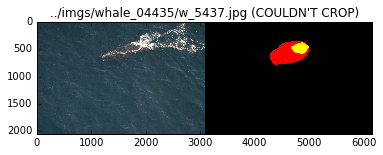

(1965, 721)
(2241, 977)
(1628, 703)
(3063, 1782)
(1368, 954)
(1359, 1410)
(1599, 942)
(1170, 1189)
(1782, 1178)
(1660, 1085)
(1022, 1183)
(1374, 1216)
(1436, 1496)
(1870, 1162)
(1225, 1079)
(1308, 976)
(1666, 1295)
(1317, 867)
(1905, 1228)
(1842, 977)
(1633, 805)
(1760, 757)
(1511, 655)
(1785, 850)
(1684, 1091)
(1336, 1288)
(1914, 1099)
(1418, 1105)
(1318, 694)
(1464, 1434)
(1896, 2397)
(1596, 1087)
(1390, 1109)
(1606, 1502)
(2478, 1415)
(1211, 2124)
(2460, 1793)
(1471, 781)
(1466, 1234)
(3307, 2121)
(1491, 650)
(1373, 1045)
(1759, 1027)
(1528, 1192)
(2300, 1870)
(1127, 1188)
(3134, 1654)
(1619, 893)
(1573, 1325)
(1956, 1005)
(2633, 1556)
(2295, 1618)
(2278, 1976)
(1547, 1118)
(1214, 1408)
(1480, 1133)
(1773, 1485)
(1975, 1021)
(829, 1142)
(2272, 2297)
(737, 709)
(2218, 2104)
(1591, 1400)
(1479, 847)
(1330, 1019)
(1952, 1284)
(1693, 1114)
(1732, 605)
(1534, 1001)
(1718, 1240)
(1536, 958)
(1762, 620)
(1398, 901)
(1128, 1165)
(1691, 810)
(1657, 993)
(2812, 1957)
(2999, 1745)
(2017, 1079)

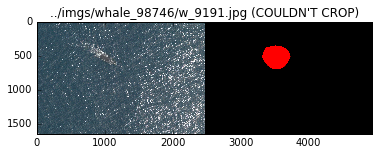

(1916, 1345)
(1045, 363)


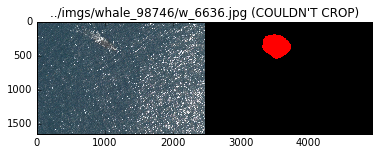

(1806, 1039)
(1134, 1702)
(1227, 890)
(1952, 1003)
(1888, 1299)
(2286, 1210)
(782, 524)


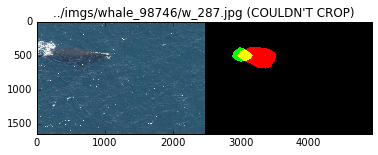

(1032, 767)
(1009, 978)
(1018, 145)


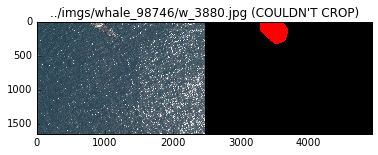

(1535, 1400)
(993, 893)
(1897, 1376)
(1546, 1542)
(1481, 1450)
(1725, 1263)
(1520, 1243)
(1556, 1573)
(3605, 2734)
(1488, 1183)
(3355, 2595)
(1776, 1267)
(1891, 1059)
(1475, 1194)
(1198, 1339)
(894, 1586)
(3142, 2221)
(2053, 1005)
(1583, 770)
(2969, 2378)
(1584, 939)
(1242, 833)
(2490, 1556)
(1344, 975)
(1378, 1335)
(1695, 997)
(1627, 1284)
(1385, 1335)
(1759, 1152)
(1833, 972)
(1388, 865)
(1408, 965)
(1588, 1347)
(1264, 920)
(1256, 1396)
(1775, 1213)
(1529, 907)
(1753, 1028)
(1684, 598)


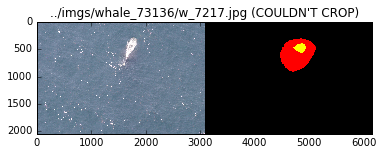

(1622, 1041)
(1799, 1080)
(1816, 889)
(1358, 901)
(1095, 1088)
(2059, 1135)
(1569, 1320)
(1702, 1028)
(1530, 1335)
(1260, 1228)
(1478, 1180)
(1857, 1089)
(1566, 1151)
(1996, 659)
(2083, 2307)
(2652, 2184)
(2085, 1352)
(2059, 2064)
(1902, 1569)
(1452, 1136)
(1197, 1489)
(1812, 1415)
(1132, 798)
(2011, 1207)
(1815, 1477)
(1032, 1074)
(1391, 1025)
(1453, 1004)
(1470, 983)
(1320, 709)
(1252, 1066)
(1559, 1029)
(1179, 1318)
(1861, 1338)
(1384, 887)
(1528, 840)
(1369, 897)
(1005, 785)
(1915, 814)
(2751, 1743)
(1960, 659)
(2084, 1546)
(1626, 1282)
(1721, 1012)
(1838, 1248)
(1181, 1113)
(1380, 967)
(1293, 777)
(1164, 1014)
(1691, 976)


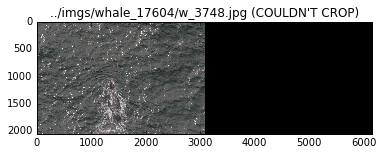

(1463, 1271)
(1582, 944)
(1596, 875)
(1083, 1440)
(1697, 1466)
(1652, 1148)
(1549, 921)
(1166, 741)
(1447, 914)
(1619, 905)
(1413, 1264)
(1945, 1354)
(1631, 799)
(856, 963)
(1573, 1193)
(1891, 1080)
(1499, 1223)
(1366, 1737)
(1585, 1267)
(1683, 925)
(1626, 916)
(1357, 1254)
(1538, 989)
(1646, 951)
(1523, 1346)
(1714, 923)
(1700, 1031)
(1549, 958)
(1536, 1468)
(2087, 1070)
(1181, 1182)
(1609, 1385)
(1554, 1320)
(1545, 1181)
(2750, 1288)
(2166, 1446)
(1595, 1302)
(3022, 1886)
(1774, 1884)
(1380, 1012)
(1691, 1254)
(2277, 1316)
(1257, 624)
(1537, 1137)
(2310, 1832)
(1147, 1032)
(2800, 2576)
(1777, 1333)
(1885, 1428)
(1867, 777)
(2449, 2699)
3600 of 4543
(2393, 2702)
(1756, 734)
(2494, 2235)
(1635, 1184)
(1138, 977)
(1130, 952)
(1366, 990)
(1765, 1161)
(1981, 1206)
(1830, 1151)
(1530, 1012)
(1372, 1161)
(1623, 1146)
(890, 613)
(3089, 773)
(2741, 1788)
(1294, 552)


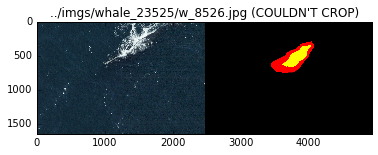

(1421, 1195)
(1863, 1141)
(1384, 746)
(1663, 1124)
(1613, 1168)
(1938, 1024)
(1744, 1197)
(1626, 1331)
(1700, 907)
(1365, 865)
(1699, 1214)
(1487, 1064)
(1289, 993)
(1641, 895)
(1869, 870)
(1855, 985)
(1310, 1001)
(1858, 945)
(1479, 1360)
(1493, 690)
(1389, 1298)
(1286, 1027)
(1621, 1047)
(1578, 1581)
(2386, 1811)
(2912, 2145)
(2559, 1531)
(1338, 712)
(2186, 2394)
(1199, 947)
(2879, 1659)
(2505, 1897)
(3955, 1898)
(1793, 1161)
(1694, 653)
(1337, 925)
(2935, 1790)
(1387, 1317)
(1528, 1076)
(1850, 1131)
(4462, 1744)
(1602, 580)


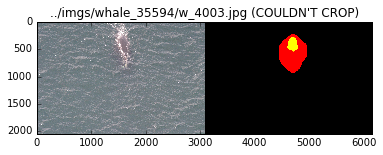

(1799, 915)
(3717, 1695)
(3873, 1788)
(1242, 1584)
(1354, 1114)
(3200, 2349)
(1728, 882)
(1407, 1027)
(1342, 985)
(1570, 1380)
(1097, 1234)
(1779, 1286)
(1314, 1454)
(1759, 1305)
(1644, 1083)
(2574, 2002)
(1949, 867)
(1485, 1299)
(1346, 919)
(2456, 1812)
(2968, 1908)
(1455, 761)
(1719, 912)
(1855, 714)
(1695, 898)
(2075, 859)
(1721, 885)
(1832, 900)
(1915, 953)
(1669, 1274)
(1422, 588)


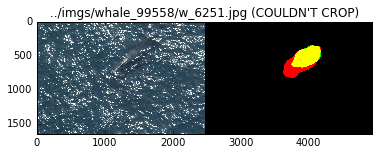

(1554, 463)


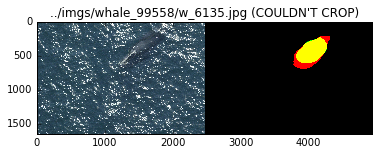

(1299, 167)


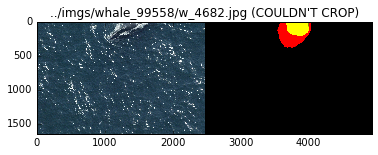

(1414, 662)
(1645, 801)
(1498, 115)


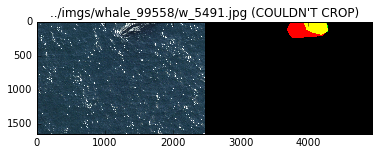

(1503, 549)


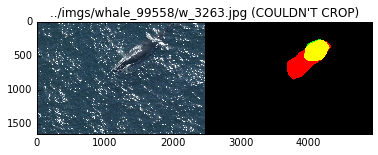

(1633, 606)
(1366, 405)


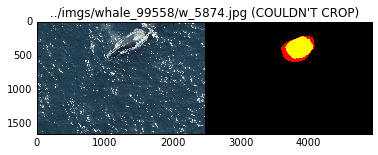

(1543, 742)
(1321, 901)
(731, 1181)


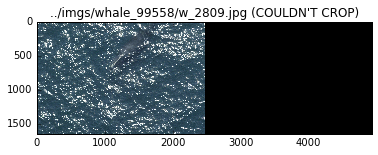

(1156, 860)
(1733, 1235)
(1448, 1296)
(1684, 1307)
(1821, 1358)
(1917, 1108)
(2092, 1119)
(1553, 1115)
(1463, 695)
(1782, 1224)
(1488, 872)
(1467, 715)
(1428, 836)
(1502, 1247)
(1526, 1116)
(1847, 1337)
(2380, 1600)
(1916, 1069)
(1801, 832)
(1766, 1228)
(1479, 692)
(1463, 773)
(1998, 697)
(1649, 978)
(1684, 824)
(1222, 1290)
(1628, 948)
(1789, 1333)
(1466, 924)
(1452, 922)
(1033, 1186)
(1142, 976)
(1543, 888)
(1069, 1542)
(1354, 1178)
(1468, 1139)
(2661, 1804)
(2754, 1641)
(1706, 777)
(2662, 1687)
(1379, 1005)
(1375, 1172)
(1383, 1212)
(1566, 1222)
(1418, 795)
(1939, 892)
(2624, 2112)
(743, 876)
(1625, 1344)
(2697, 1475)
(2119, 1519)
(2421, 1445)
(1232, 1308)
(1405, 1021)
(1662, 1044)
(2255, 870)
(2211, 1201)
(1710, 1274)
(1261, 815)
(1601, 1021)
(1670, 1193)
(1326, 1513)
(1405, 603)
(1487, 678)
(1817, 1300)
(1232, 892)
(1265, 1106)
(1548, 1077)
(2621, 2277)
(3196, 2743)
(1507, 951)
(2490, 2120)
(1794, 832)
(1705, 1121)
(1569, 1039)
(1420, 253)


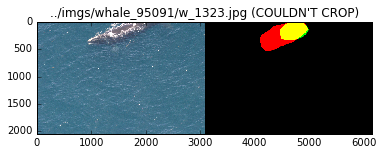

(3500, 1946)
(1129, 1059)
(3465, 2339)
(1341, 1204)
(1771, 942)
(1585, 1113)
(2281, 1603)
(1633, 1294)
(1212, 941)
(1831, 1211)
(3437, 2650)
(2784, 2840)
(3391, 2467)
(1405, 900)
(1652, 1383)
(1695, 786)
(3829, 2617)
(2094, 824)
(3167, 1853)
(1332, 1048)
(1807, 731)
(1630, 924)
3800 of 4543
(1490, 1109)
(1909, 1205)
(1616, 1275)
(1986, 891)
(1734, 944)
(1727, 659)
(1513, 851)
(1679, 1200)
(1454, 1108)
(1624, 1114)
(1443, 737)
(1760, 1266)
(1644, 1322)
(1350, 901)
(1315, 671)
(2087, 1177)
(1372, 1142)
(1646, 825)
(2614, 1271)
(1559, 1042)
(1899, 1264)
(1565, 1161)
(2028, 1387)
(1755, 738)
(1331, 1313)
(1190, 1124)
(2339, 2051)
(2091, 1123)
(2959, 2258)
(3040, 1279)
(2126, 2105)
(1887, 706)
(1788, 1395)
(1891, 1148)
(2317, 1655)
(1257, 767)
(1472, 974)
(1192, 831)
(1512, 1202)
(1932, 1661)
(1968, 1122)
(1774, 728)
(1739, 1010)
(2021, 933)
(849, 884)
(1553, 989)
(1551, 1019)
(1480, 807)
(1419, 1015)
(1765, 1334)
(1165, 1536)
(1121, 1159)
(1533, 991)
(1640, 620)
(1612, 882)
(1765, 1395)
(1

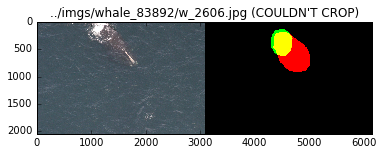

(1488, 1493)
(1040, 1443)
(1787, 1369)
(1787, 1256)
(1640, 1138)
(1513, 761)
(1615, 1198)
(1666, 1120)
(1501, 1055)
(1580, 963)
(1632, 1115)
(1690, 1250)
(1470, 1304)
(1425, 1087)
(1778, 940)
(1990, 1280)
(1919, 1482)
(1335, 827)
(1298, 636)
(2100, 1187)
(2929, 1261)
(2116, 1323)
(2172, 1998)
(1603, 1003)
(1985, 1217)
(2782, 1735)
(1437, 907)
(1483, 1338)
(1652, 1302)
(1657, 1001)
(1896, 992)
(1703, 1496)
(2616, 2079)
(1664, 1742)
(1487, 1199)
(2783, 1819)
(3074, 1803)
(2732, 1760)
(2655, 2389)
(1583, 757)
(1339, 1165)
(1546, 1016)
(2591, 1723)
(2974, 1397)
(2792, 1699)
(1677, 1145)
(1512, 982)
(2676, 1688)
(2941, 1873)
(1366, 1308)
(2588, 1779)
(3077, 2369)
(1549, 841)
(2185, 1926)
(3364, 1597)
(1822, 1061)
(1837, 1560)
(1530, 964)
(1635, 1009)
(2122, 3285)
(1428, 1090)
(1663, 681)
(1863, 2413)
(3000, 2313)
(3500, 1687)
(1352, 1133)
(1764, 817)
(1819, 1445)
(1826, 1101)
(1107, 810)
(1412, 1165)
(1341, 789)
(1627, 1442)
(1579, 955)
(1693, 1099)
(3217, 2086)
(1830, 1167)
(1465, 1357)
(2

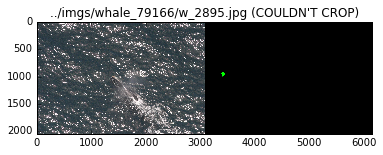

(1385, 1619)
(1942, 1533)
(1831, 807)
(1446, 1360)
(1826, 1661)
(1023, 1042)
(1461, 829)
(1649, 1182)
(2892, 1828)
(2940, 2259)
(2111, 1127)
(1869, 1180)
(1615, 1721)
(1322, 1234)
(2765, 2080)
(2542, 1838)
(1725, 2542)
(1389, 1085)
(1554, 1106)
(1781, 1128)
(1563, 1220)
(2861, 1844)
(1611, 1087)
(2930, 1709)
(1461, 1799)


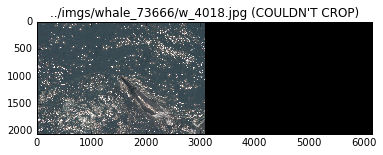

(1245, 945)
(1607, 916)
(1381, 1039)
(1985, 1272)
(1537, 1028)
(1586, 1122)
(2035, 1150)
(1597, 938)
(1685, 1157)
(1218, 1587)
(1554, 1262)
(1382, 1006)
(1936, 1236)
(1828, 933)
(1594, 716)
(1356, 1232)
(2124, 1153)
(1437, 898)
(1518, 1631)
(1509, 1198)
(1481, 958)
(1559, 1284)
(1823, 1002)
(1330, 1166)
(1939, 1513)
(1396, 862)
4000 of 4543
(1451, 684)
(1674, 1184)
(2325, 1945)
(2609, 2331)
(1316, 1230)
(1904, 1475)
(2126, 1175)
(1683, 956)
(1678, 1192)
(1331, 845)
(1403, 1079)
(1248, 741)
(1782, 1148)
(1523, 1480)
(1231, 1068)
(1459, 1451)
(2064, 1005)
(1154, 1008)
(1935, 1217)
(1616, 992)
(2022, 1052)
(1309, 982)
(1212, 797)
(1419, 813)
(3635, 1422)
(3615, 1641)
(2626, 1480)
(2968, 1255)
(1992, 756)
(1429, 1038)
(1173, 1234)
(1482, 1087)
(1593, 996)
(1655, 1268)
(1907, 1257)
(2867, 1634)
(1923, 1132)
(1524, 657)
(2443, 1703)
(2020, 1876)
(1778, 995)
(1293, 854)
(1600, 1236)
(2010, 1269)
(1677, 791)
(2605, 1226)
(1475, 959)
(1938, 1203)
(3028, 2015)
(1684, 1411)
(2225, 2003)
(1676, 12

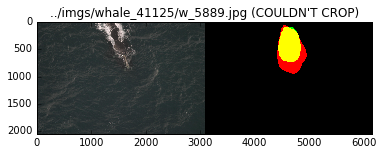

(1720, 740)
(1915, 1071)
(1391, 847)
(1534, 1376)
(1617, 597)


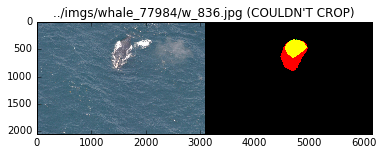

(2120, 2112)
(2739, 2102)
(1435, 842)
(2837, 2082)
(2708, 2422)
(1668, 751)
(3183, 1934)
(1433, 1207)
(1440, 484)


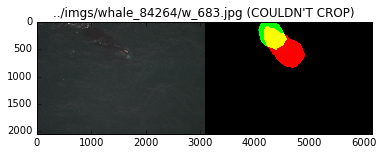

(1317, 1513)
(1289, 586)


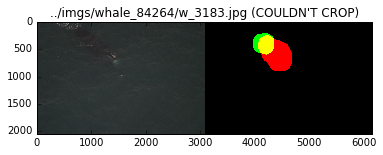

(1323, 1098)
(1881, 745)
(1887, 1168)
(1536, 877)
(2121, 1017)
(1459, 1232)
(1099, 1221)
(1376, 842)
(1921, 1035)
(2733, 1553)
(1181, 1122)
(2096, 1011)
(2547, 1151)
(2452, 1599)
(1487, 1094)
(1480, 1243)
(2059, 638)
(2441, 1909)
(2036, 1105)
(1365, 986)
(1277, 950)
(1300, 1151)
(2930, 2383)
(1740, 1692)
(1254, 1027)
(2785, 1971)
(1909, 1307)
(2633, 2003)
(2551, 1883)
(3099, 2667)
(2708, 2386)
(1383, 819)
(1347, 1151)
(3239, 1217)
4200 of 4543
(2522, 1553)
(1511, 528)


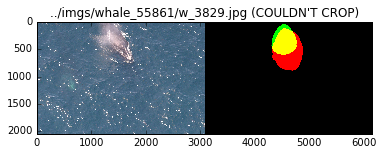

(1779, 1180)
(2814, 1893)
(1884, 867)
(1559, 1513)
(2221, 2225)
(1904, 914)
(1522, 717)
(3143, 2398)
(1191, 680)
(1325, 1176)
(982, 641)
(1886, 2013)
(1027, 1577)
(2294, 2862)
(1276, 1099)
(1955, 1505)
(1352, 1278)
(2101, 1677)
(1902, 1012)
(1975, 1104)
(1226, 1186)
(1433, 946)
(2313, 1779)
(783, 1697)
(1871, 978)
(2025, 1435)
(1384, 904)
(1715, 1447)
(1817, 1294)
(1603, 904)
(1379, 875)
(1208, 836)
(2023, 1336)
(1301, 688)
(1622, 1201)
(1607, 977)
(1394, 910)
(1135, 1312)
(2106, 945)
(1866, 1444)
(1614, 615)
(1238, 1495)
(1895, 752)
(1666, 1144)
(1318, 1414)
(1377, 1177)
(1888, 1337)
(2195, 1162)
(1508, 1094)
(1197, 1139)
(1158, 1071)
(1644, 961)
(1650, 1387)
(1730, 1059)
(1715, 1168)
(1359, 1084)
(1135, 1039)
(2077, 1203)
(1556, 1137)
(2057, 891)
(2067, 1133)
(1742, 909)
(1848, 1386)
(1205, 1284)
(1574, 765)
(1412, 1319)
(1980, 1517)
(1748, 1100)
(1345, 1051)
(1730, 1019)
(1292, 926)
(1472, 1207)
(1507, 1085)
(1455, 958)
(1450, 724)
(807, 725)
(1948, 665)
(1416, 941)
(1857, 914)
(138

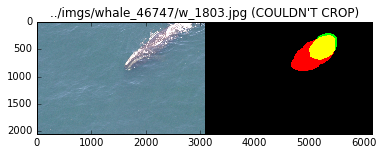

(1881, 759)
(1595, 1105)
(1692, 1295)
(1734, 1611)
(1889, 1195)
(1761, 1213)
(1863, 1281)
(1683, 1326)
(1578, 1212)
(1645, 1312)
(1319, 886)
(1731, 762)
(1360, 924)
(1673, 1068)
(1352, 574)


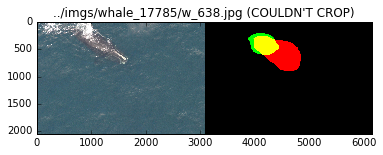

(1291, 922)
(1175, 1424)
(1859, 871)
(1725, 641)
(1874, 1286)
(1792, 718)
(1630, 972)
(1552, 1150)
(1256, 1102)
(1656, 877)
(1610, 1124)
(1288, 1069)
(1374, 1142)
(1156, 917)
(1375, 1033)
(1549, 1226)
(2041, 1048)
(1599, 939)
(2093, 1050)
(1326, 870)
(1315, 1091)
(1596, 1114)
(1426, 983)
(1479, 1012)
(1490, 1055)
(1772, 814)
(1769, 897)
(1507, 755)
(1280, 1237)
(1708, 835)
(1039, 1482)
(1619, 892)
(1475, 834)
(1393, 1181)
(1359, 944)
(2179, 1341)
(1633, 1214)
(1408, 955)
(1254, 974)
(1554, 1221)
(1693, 1485)
(1709, 997)
(1582, 977)
(1423, 1309)
(1209, 1445)
(1171, 1355)
(1343, 1228)
(1525, 888)
(1117, 966)
(1543, 896)
(2151, 2284)
(1722, 1141)
(1980, 1525)
(1461, 1869)
(2082, 1463)
(1356, 836)
(1486, 980)
(1257, 1512)
(1341, 766)
(1455, 1391)
(1207, 746)
(1640, 1158)
(1510, 1165)
(1531, 1007)
(2201, 1852)


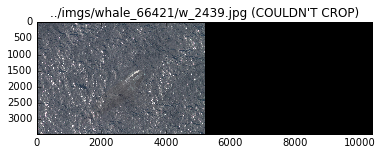

(3028, 2549)
(1952, 1882)
(2465, 2332)
(1894, 1122)
(1529, 959)
(2244, 2439)
(1794, 1187)
(1532, 1173)
(2080, 946)
(1760, 867)
(1631, 1167)
(1625, 496)


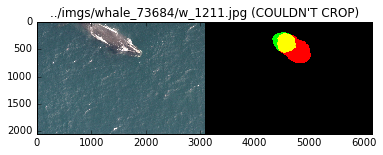

(1326, 1697)
(1561, 981)
(1527, 954)
(1790, 870)
(1354, 1083)
(1622, 1131)
(1891, 1284)
(1288, 1190)
(1818, 1001)
(1929, 1239)
(1729, 1109)
4400 of 4543
(3067, 1954)
(1799, 1073)
(2857, 1449)
(1661, 877)
(1455, 1091)
(1623, 838)
(1361, 608)
(1492, 496)


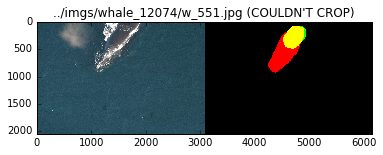

(1541, 1536)
(1836, 637)
(1243, 1126)
(1268, 1576)
(1722, 1282)
(1275, 1187)
(1665, 957)
(1421, 1182)
(2024, 1885)
(1886, 1347)
(1950, 1250)
(1607, 1384)
(3212, 1847)
(2372, 1735)
(2409, 2214)
(1714, 2115)
(1812, 1296)
(1149, 1043)
(2093, 1119)
(2250, 2020)
(3463, 1628)
(1297, 1058)
(1679, 2022)
(1443, 981)
(1350, 882)
(1420, 1157)
(1346, 1274)
(1593, 865)
(2969, 1547)
(1253, 985)
(1285, 905)
(1640, 1110)
(2009, 1495)
(1992, 884)
(2152, 852)
(1852, 1005)
(2922, 1760)
(1288, 967)
(1231, 656)
(1428, 1168)
(1946, 1190)
(1191, 1184)
(2028, 884)
(1453, 1063)
(1928, 867)
(3670, 1457)
(2912, 1807)
(1359, 843)
(1586, 1109)
(2704, 1600)
(2289, 1779)
(1541, 1153)
(2753, 1726)
(2418, 2850)
(1981, 1063)
(1324, 288)


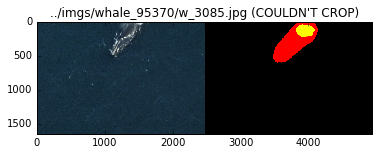

(1783, 1203)
(1553, 956)
(2855, 1842)
(1200, 1369)
(1666, 1224)
(1016, 432)


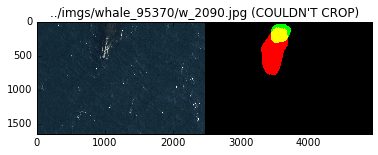

(1319, 650)
(1478, 723)
(1794, 1194)
(1389, 736)
(1667, 858)
(2080, 1101)
(1572, 1250)
(1465, 1156)
(1376, 1274)
(1367, 844)
(1797, 881)
(1703, 1427)
(1552, 1086)
(1521, 507)


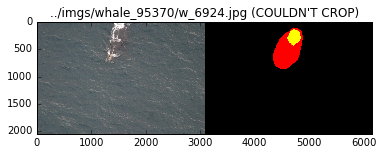

(1370, 578)


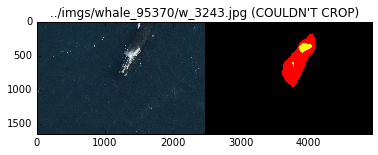

(1149, 866)
(1373, 810)
(1415, 1145)
(1730, 827)
(1705, 1294)
(2796, 1652)
(1124, 278)


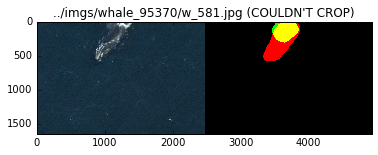

(1364, 285)


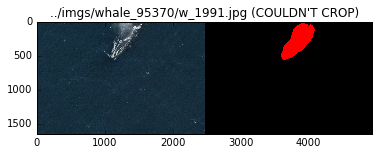

(2579, 1935)
(1242, 1303)
(2020, 1583)
(873, 429)


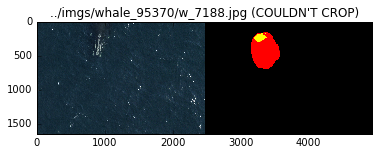

(1222, 406)


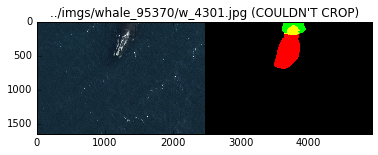

(1439, 425)


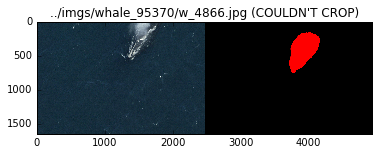

(1476, 1072)
(1997, 681)
(1694, 971)
(1336, 448)


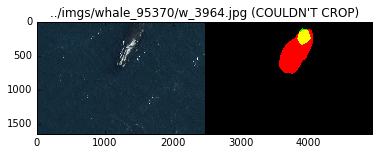

(1249, 446)


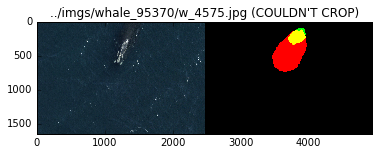

(1747, 1134)
(3515, 2263)
(2255, 1350)
(1983, 1127)
(2590, 987)
(1998, 1411)
(1613, 915)
(1984, 1650)
(1218, 1353)
(1783, 1213)
(1058, 1420)
(1342, 1367)
(1015, 1472)
(2340, 826)
(1440, 1016)
(3038, 1543)
(1256, 1063)
(1797, 1004)
(1299, 817)
(1833, 964)
(1036, 1338)
(1894, 1526)
(1453, 1747)
(1793, 949)


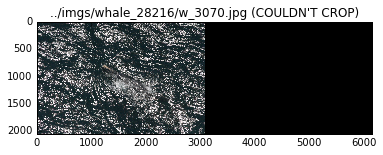

(1784, 950)
(1945, 1231)
(1457, 1231)
(1426, 901)
(1832, 1085)
(1613, 1251)
(765, 1424)
(1217, 1002)
(2014, 1345)
(1979, 866)
(1047, 1046)
(1955, 1301)
(2024, 987)
(1879, 1136)


In [115]:
for i in range(nObs)[:]:
    imgPath = imgPaths[i]
    im = imgCropRotate(imgPath)
    if i % 200 == 0:
        print("%d of %d" %(i,nObs))
    #im.showCentroids()
    im.crop(0)
